In [15]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import copy
from torchsummary import summary

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device  = "mps"
else:
    device  = "cpu"

from sklearn.decomposition import PCA 
import numpy as np
from matplotlib import pyplot as plt

In [3]:
batch_size = 128

trainset = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
trainset.targets = torch.randint(0, 10, trainset.targets.shape)
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
testset.targets = torch.randint(0, 10, testset.targets.shape)
test_loader = torch.utils.data.DataLoader(testset ,batch_size = batch_size, shuffle=True)

In [4]:
class Model (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
def evaluate_test_loss(dataloader, model): 
    loss_fn = nn.CrossEntropyLoss()
    
    model.eval()
    
    # train and store epoch training loss
    epoch_test_loss = 0.0
    for batch, (X_test, y_test) in enumerate(dataloader): 
        X_test = X_test.to(device).reshape(-1, 28*28)
        y_test = y_test.to(device)

        # compute model predictions and loss
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)

        # update epoch loss with batch loss (epoch loss := mean batch loss throughout all batches)
        epoch_test_loss += loss.item() / len(dataloader)
    
    # return epoch loss
    return epoch_test_loss

In [8]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)
num_epochs = 100

train_loss_list = []
test_loss_list = []

for epoch in range(num_epochs):

    loss_per_epoch = 0
    model = model.to(device)
    model.train()

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device).reshape(-1, 28*28)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        loss_per_epoch += loss.item() / len(train_loader)

    train_loss_list.append(loss_per_epoch)
    test_loss_list.append(evaluate_test_loss(test_loader, model))

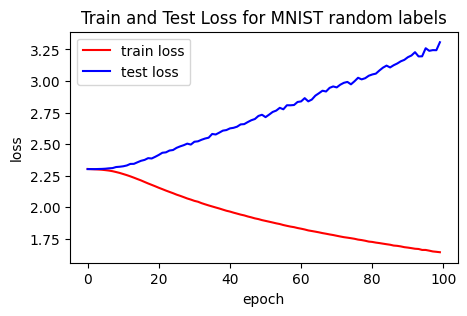

In [14]:
plt.figure(figsize=(5,3))
plt.plot(train_loss_list, color='red')
plt.plot(test_loss_list, color='blue')
plt.legend(["train loss", "test loss"])
plt.title("Train and Test Loss for MNIST random labels")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [17]:
summary(model.to('cpu'), (1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
            Linear-2                [-1, 1, 32]           4,128
            Linear-3                [-1, 1, 10]             330
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.40
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [18]:
batch_size = 128

trainset = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(testset ,batch_size = batch_size, shuffle=True)

In [32]:
class Model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 16)
        self.fc2 = nn.Linear(16, 10)


    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 48)
        self.fc2 = nn.Linear(48, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Model4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 80)
        self.fc2 = nn.Linear(80, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

class Model5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 96)
        self.fc2 = nn.Linear(96, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 112)
        self.fc2 = nn.Linear(112, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Model7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Model8(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x



class Model9(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

model_list = [Model0(), Model1(), Model2(), Model3(), Model4(), Model5(), Model6(), Model7(), Model8(), Model9()]

In [33]:
def params_count(model):
    return sum(params.numel() for params in model.parameters() if params.requires_grad)

def test_test_data(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            images, labels = images.to(device).reshape(-1, 28*28), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

def test_train_data(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader:
            images,labels = data
            images, labels = images.to(device).reshape(-1, 28*28), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

In [34]:
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
params_list = []

for model_type in model_list:    

    model = model_type
    params_list.append(params_count(model))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)
    num_epochs = 50


    for epoch in range(num_epochs):

        loss_per_epoch = 0
        model = model.to(device)
        model.train()

        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device).reshape(-1, 28*28)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            

            loss_per_epoch += loss.item() / len(train_loader)

    train_loss_list.append(loss_per_epoch)
    test_loss_list.append(evaluate_test_loss(test_loader, model))
    train_acc_list.append(test_train_data(model))
    test_acc_list.append(test_test_data(model))

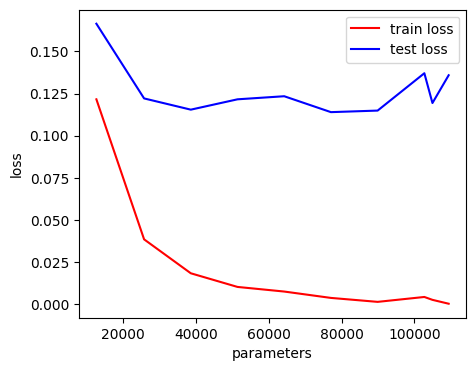

In [47]:
plt.figure(figsize=(5,4))
plt.plot(params_list, train_loss_list, color='red',  label = "train loss")
plt.plot(params_list, test_loss_list, color='blue', label = "test loss")
plt.legend()
plt.xlabel("parameters")
plt.ylabel("loss")
plt.show()

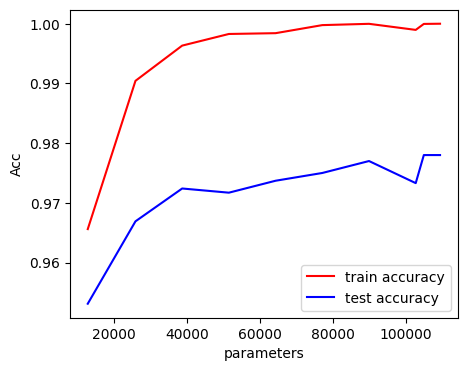

In [49]:
plt.figure(figsize=(5,4))
plt.plot(params_list, train_acc_list, color='red', label = "train accuracy")
plt.plot(params_list, test_acc_list, color='blue', label = "test accuracy")
plt.legend()
plt.xlabel("parameters")
plt.ylabel("Acc")
plt.show()

In [62]:
batch_size = 64

trainset = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(testset ,batch_size = batch_size, shuffle=True)

In [63]:
batch_size = 1024

trainset2 = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader2 = torch.utils.data.DataLoader(trainset2, batch_size = batch_size, shuffle=True)

testset2 = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader2 = torch.utils.data.DataLoader(testset2 ,batch_size = batch_size, shuffle=True)

In [72]:
class Model (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [73]:
def interpolate_models(model_A, model_B, alpha):
    interpolated_model = Model().to(device)
    # set weights
    for p in interpolated_model.state_dict():
        p_a = model_A.state_dict()[p].cpu().numpy()
        p_b = model_B.state_dict()[p].cpu().numpy()
        interpolated_model.state_dict()[p][:] = torch.Tensor((1-alpha)*p_a + alpha*p_b)
    
    return interpolated_model.to(device)

In [74]:
model_batch1 = Model()
model_batch2 = Model()
model_lr1 = Model()
model_lr2 = Model()

In [75]:
num_epochs = 50

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_batch1.parameters(), lr = 1e-3)

for epoch in range(num_epochs):

    loss_per_epoch = 0
    model_batch1 = model_batch1.to(device)
    model_batch1.train()

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device).reshape(-1, 28*28)
        labels = labels.to(device)

        # forward pass
        outputs = model_batch1(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [76]:
num_epochs = 50

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_batch2.parameters(), lr = 1e-3)

for epoch in range(num_epochs):

    loss_per_epoch = 0
    model_batch2 = model_batch2.to(device)
    model_batch2.train()

    for i, (images, labels) in enumerate(train_loader2):
        images = images.to(device).reshape(-1, 28*28)
        labels = labels.to(device)

        # forward pass
        outputs = model_batch2(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [96]:
num_epochs = 50

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lr1.parameters(), lr = 1e-3)

for epoch in range(num_epochs):

    loss_per_epoch = 0
    model_lr1 = model_lr1.to(device)
    model_lr1.train()

    for i, (images, labels) in enumerate(train_loader2):
        images = images.to(device).reshape(-1, 28*28)
        labels = labels.to(device)

        # forward pass
        outputs = model_lr1(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [78]:
num_epochs = 50

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lr2.parameters(), lr = 1e-2)

for epoch in range(num_epochs):

    loss_per_epoch = 0
    model_lr2 = model_lr2.to(device)
    model_lr2.train()

    for i, (images, labels) in enumerate(train_loader2):
        images = images.to(device).reshape(-1, 28*28)
        labels = labels.to(device)

        # forward pass
        outputs = model_lr2(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [97]:
train_loss_list_alpha_batch = []
test_loss_list_alpha_batch = []
train_acc_list_alpha_batch = []
test_acc_list_alpha_batch = []

train_loss_list_alpha_lr = []
test_loss_list_alpha_lr = []
train_acc_list_alpha_lr = []
test_acc_list_alpha_lr = []

In [98]:
alpha_list = np.linspace(-1, 2,100)
for alpha in alpha_list:
    model_alpha_batch = interpolate_models(model_batch1, model_batch2, alpha)
    model_alpha_lr = interpolate_models(model_lr1, model_lr2, alpha)
    
    train_loss_list_alpha_batch.append(evaluate_test_loss(train_loader, model_alpha_batch))
    test_loss_list_alpha_batch.append(evaluate_test_loss(test_loader, model_alpha_batch))
    train_acc_list_alpha_batch.append(test_train_data(model_alpha_batch))
    test_acc_list_alpha_batch.append(test_test_data(model_alpha_batch))
    
    train_loss_list_alpha_lr.append(evaluate_test_loss(train_loader, model_alpha_lr))
    test_loss_list_alpha_lr.append(evaluate_test_loss(test_loader, model_alpha_lr))
    train_acc_list_alpha_lr.append(test_train_data(model_alpha_lr))
    test_acc_list_alpha_lr.append(test_test_data(model_alpha_lr))

In [110]:
alpha_list

array([-1.        , -0.96969697, -0.93939394, -0.90909091, -0.87878788,
       -0.84848485, -0.81818182, -0.78787879, -0.75757576, -0.72727273,
       -0.6969697 , -0.66666667, -0.63636364, -0.60606061, -0.57575758,
       -0.54545455, -0.51515152, -0.48484848, -0.45454545, -0.42424242,
       -0.39393939, -0.36363636, -0.33333333, -0.3030303 , -0.27272727,
       -0.24242424, -0.21212121, -0.18181818, -0.15151515, -0.12121212,
       -0.09090909, -0.06060606, -0.03030303,  0.        ,  0.03030303,
        0.06060606,  0.09090909,  0.12121212,  0.15151515,  0.18181818,
        0.21212121,  0.24242424,  0.27272727,  0.3030303 ,  0.33333333,
        0.36363636,  0.39393939,  0.42424242,  0.45454545,  0.48484848,
        0.51515152,  0.54545455,  0.57575758,  0.60606061,  0.63636364,
        0.66666667,  0.6969697 ,  0.72727273,  0.75757576,  0.78787879,
        0.81818182,  0.84848485,  0.87878788,  0.90909091,  0.93939394,
        0.96969697,  1.        ,  1.03030303,  1.06060606,  1.09

In [112]:
model_alpha_batch = interpolate_models(model_batch1, model_batch2, 2)
test_test_data(model_alpha_batch)

0.25

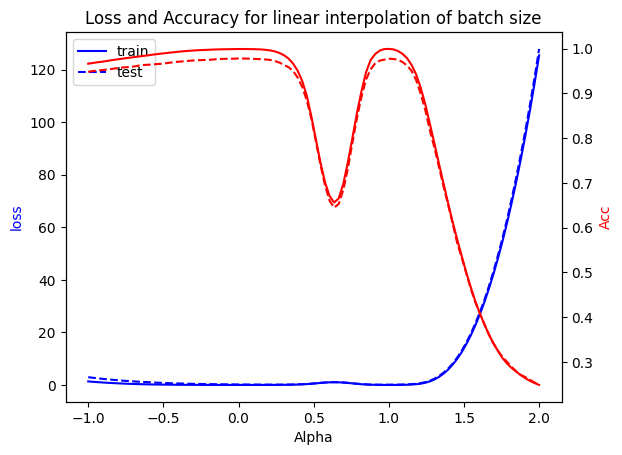

In [128]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Alpha')
ax1.set_ylabel('loss', color='blue')
ax1.plot(alpha_list, train_loss_list_alpha_batch, color='blue', label="train")
ax1.plot(alpha_list, test_loss_list_alpha_batch, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Acc', color='red')
ax2.plot(alpha_list, train_acc_list_alpha_batch, color='red')
ax2.plot(alpha_list, test_acc_list_alpha_batch, '--', color='red')
plt.title("Loss and Accuracy for linear interpolation of batch size")
plt.show()

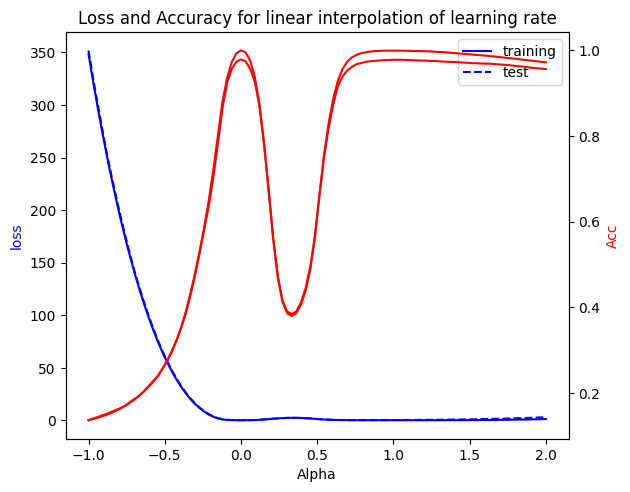

In [129]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Alpha')
ax1.set_ylabel('loss', color='blue')
ax1.plot(alpha_list, train_loss_list_alpha_lr, color='blue', label="training")
ax1.plot(alpha_list, test_loss_list_alpha_lr, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Acc', color='red')
ax2.plot(alpha_list, train_acc_list_alpha_lr, color='red', label="sensitivity")
ax2.plot(alpha_list, test_acc_list_alpha_lr, color='red', label="sensitivity")
fig.tight_layout()
plt.title("Loss and Accuracy for linear interpolation of learning rate")
plt.show()

In [170]:
batch_size = 1024

trainset = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(testset ,batch_size = batch_size, shuffle=True)

In [171]:
learning_rates = [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
training_loss_data=[]
test_loss_data=[]
training_accuracy_data=[]
test_accuracy_data=[]
sensitivity_data=[]


for lr in learning_rates:  

    train_accuracies=[]
    test_accuracies=[]
    train_losses=[]
    test_losses=[]
    sensitivities=[]

    model = Model().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)
    

    for epoch in range(60):
        

        epoch_sensitivity = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device).reshape(-1, 28*28)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward and optimize
            optimizer.zero_grad()
        

            grads_p = torch.autograd.grad(loss, model.parameters(), create_graph=True)[0]
            epoch_sensitivity += grads_p.norm(2).detach().cpu().item() / len(train_loader)

            loss.backward()
            optimizer.step()
           
        # evaluate loss on test set
        test_loss = evaluate_test_loss(test_loader, model)
        training_loss = evaluate_test_loss(train_loader, model)
        
        # evaluate accuracy on train set
        train_accuracy = test_train_data(model)
        
        # evaluate accuracy on test set
        test_accuracy = test_test_data(model)

        # store epoch stats
        train_losses.append(training_loss)
        train_accuracies.append(train_accuracy)
        sensitivities.append(epoch_sensitivity)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
    
    # store mean values for current model
    test_loss_data.append(np.mean(test_losses))
    test_accuracy_data.append(np.mean(test_accuracies))
    training_loss_data.append(np.mean(train_losses))
    training_accuracy_data.append(np.mean(train_accuracies))
    sensitivity_data.append(np.mean(sensitivities))

In [172]:
test_loss_data

[0.24726840474953254,
 0.16094715964669987,
 0.11482025974740583,
 0.10995616454631091,
 0.14503752428417405,
 0.3498570676644643]

In [173]:
test_accuracy_data

[0.9532733333333334,
 0.9736716666666667,
 0.9758533333333334,
 0.9688283333333331,
 0.9585650000000002,
 0.910175]

In [174]:
training_accuracy_data

[0.977326111111111,
 0.9937,
 0.9945597222222222,
 0.984533611111111,
 0.9678575000000001,
 0.9096874999999999]

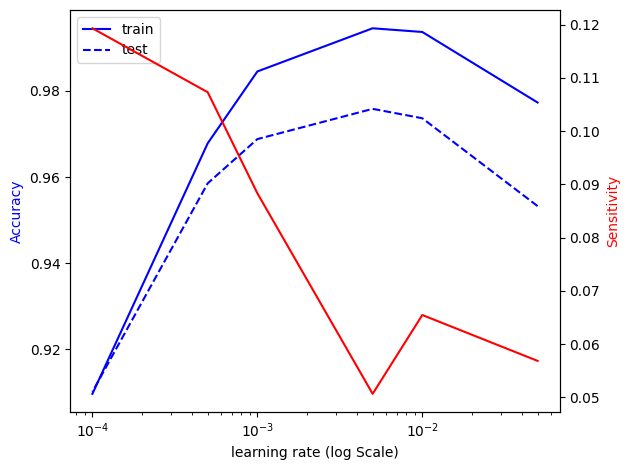

In [175]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('learning rate (log Scale)')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy', color='blue')
ax1.plot(learning_rates, training_accuracy_data, color='blue', label="train")
ax1.plot(learning_rates, test_accuracy_data, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Sensitivity', color='red')
ax2.plot(learning_rates, sensitivity_data, color='red', label="sensitivity")
fig.tight_layout()
plt.show()

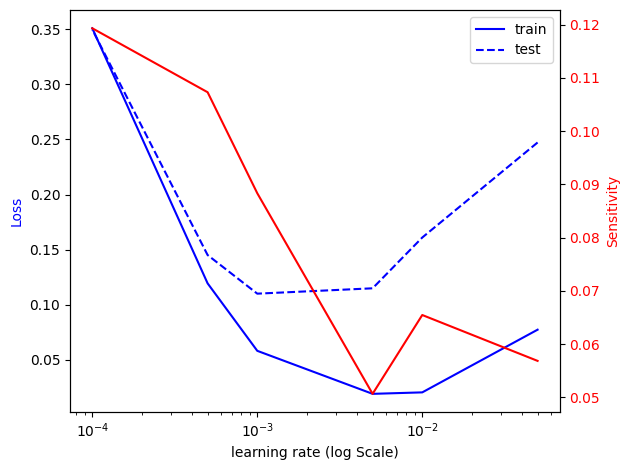

In [176]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('learning rate (log Scale)')
ax1.set_xscale('log')
ax1.set_ylabel('Loss', color='blue')
ax1.plot(learning_rates, training_loss_data, color='blue', label="train")
ax1.plot(learning_rates, test_loss_data, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Sensitivity', color='red')
ax2.plot(learning_rates,sensitivity_data,color='red',label="sensitivity")
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()
plt.show()